In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class Arm:
    def __init__(self, p):
        self.p = p
    
    def pull(self):
        return np.random.binomial(1, self.p)

class MultiBandit:
    def __init__(self, probs = [0.1, 0.2, 0.7, 0.5]):
        self.__arms = [Arm(p) for p in probs]
        self.__regret = 0
        self.__maxp = max(probs)

    def num_arms(self):
        return len(self.__arms)

    def pull(self, arm_num):
        reward = self.__arms[arm_num].pull()
        self.__regret += self.__maxp-self.__arms[arm_num].p
        return reward
    
    def regret(self):
        return self.__regret

In [10]:
class EpsilonGreedyAlgorithm:
    def __init__(self, num_arms, horizon, epsilon):
        self.num_arms = num_arms
        self.horizon = horizon
        self.epsilon = epsilon
        self.timestep = 0
        self.arm_pulls = np.zeros(num_arms)
        self.arm_rewards = np.zeros(num_arms)
        self.regrets = np.zeros(horizon)

    def give_best_arm(self):
        return np.argmax(self.arm_rewards / (self.arm_pulls + 1e-6))

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            # Exploration: Randomly choose an arm with probability epsilon
            return np.random.choice(self.num_arms)
        else:
            # Exploitation: Choose the arm with the maximum empirical mean
            return np.argmax(self.arm_rewards / (self.arm_pulls + 1e-6))

    def run_algorithm(self, bandit):
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            self.arm_pulls[arm_to_pull] += 1
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1
            self.regrets[_] = bandit.regret()
    
    def plot(self):
        plt.plot(self.regrets)
        plt.xlabel("Horizon")
        plt.ylabel("Regret")
        plt.show()

In [11]:
class UCBAlgorithm:
    def __init__(self, num_arms, horizon):
        self.num_arms = num_arms
        self.horizon = horizon
        self.timestep = 0
        self.arm_pulls = np.zeros(num_arms)
        self.arm_rewards = np.zeros(num_arms)
        self.ucb_values = np.zeros(num_arms)
        self.regrets = np.zeros(horizon)

    def select_arm(self):
        if self.timestep < self.num_arms:
            # Select each arm at least once in the beginning
            return self.timestep
        else:
            # Select arm with maximum UCB value
            return np.argmax(self.ucb_values)
    
    def give_best_arm(self):
        return np.argmax(self.arm_rewards / (self.arm_pulls + 1e-6))

    def update_ucb_values(self):
        for arm in range(self.num_arms):
            if self.arm_pulls[arm] > 0:
                mean_reward = self.arm_rewards[arm] / self.arm_pulls[arm]
                exploration_term = np.sqrt((2 * np.log(self.timestep)) / self.arm_pulls[arm])
                self.ucb_values[arm] = mean_reward + exploration_term
            else:
                # Initialize with high value for unexplored arms
                self.ucb_values[arm] = float('inf')

    def run_algorithm(self, bandit):
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            self.arm_pulls[arm_to_pull] += 1
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1
            self.update_ucb_values()
            self.regrets[_] = bandit.regret()
    
    def plot(self):
        plt.plot(self.regrets)
        plt.xlabel("Horizon")
        plt.ylabel("Regret")
        plt.show()

In [12]:
class ThompsonSamplingAlgorithm:
    def __init__(self, num_arms, horizon):
        self.num_arms = num_arms
        self.horizon = horizon
        self.timestep = 0
        self.arm_pulls = np.zeros(num_arms)
        self.arm_rewards = np.zeros(num_arms)
        self.regrets = np.zeros(horizon)

    def give_best_arm(self):
        return np.argmax(self.arm_rewards / (self.arm_pulls + 1e-6))

    def select_arm(self):
        # Sample from the posterior distribution for each arm (Beta distribution for Bernoulli rewards)
        sampled_means = np.random.beta(self.arm_rewards + 1, self.arm_pulls - self.arm_rewards + 1)
        # Choose the arm with the maximum sampled mean
        return np.argmax(sampled_means)

    def run_algorithm(self, bandit):
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            self.arm_pulls[arm_to_pull] += 1
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1
            self.regrets[_] = bandit.regret()
    
    def plot(self):
        plt.plot(self.regrets)
        plt.xlabel("Horizon")
        plt.ylabel("Regret")
        plt.show()

Total Regret after 10000 timesteps: 665.9000000000094 with best arm 2


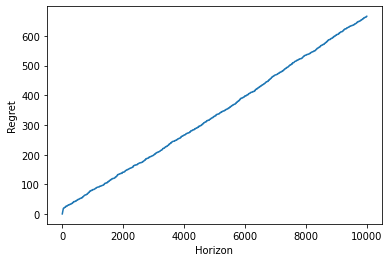

In [13]:
# Define a MultiBandit instance
bandit = MultiBandit()

# Set the horizon size
H = 10000

# Create multiple Algorithm instance

algorithm = EpsilonGreedyAlgorithm(num_arms=bandit.num_arms(), horizon=H, epsilon=0.2)


# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with best arm {algorithm.give_best_arm()}")
algorithm.plot()

Total Regret after 10000 timesteps: 98.70000000000041 with best arm 2


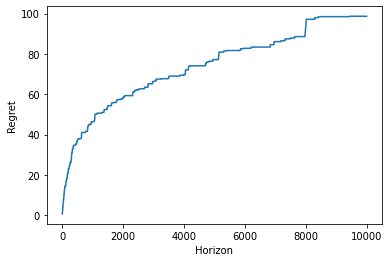

In [14]:
# Define a MultiBandit instance
bandit = MultiBandit()

# Set the horizon size
H = 10000

# Create multiple Algorithm instance

algorithm = UCBAlgorithm(num_arms=bandit.num_arms(), horizon=H)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with best arm {algorithm.give_best_arm()}")
algorithm.plot()

Total Regret after 10000 timesteps: 18.69999999999998 with best arm 2


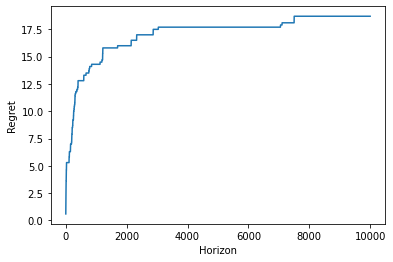

In [15]:
# Define a MultiBandit instance
bandit = MultiBandit()

# Set the horizon size
H = 10000

# Create multiple Algorithm instance

algorithm = ThompsonSamplingAlgorithm(num_arms=bandit.num_arms(), horizon=H)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with best arm {algorithm.give_best_arm()}")
algorithm.plot()